In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras


print(tf.test.is_gpu_available())
print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

True
2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.18.5
pandas 1.0.5
sklearn 0.23.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint

pprint.pprint(housing.data[:5])
pprint.pprint(housing.target[:5])


array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test = train_test_split(housing.data,housing.target,random_state=7)

x_train,x_valid,y_train,y_vaild=train_test_split(x_train_all,y_train_all,random_state=11)

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_vaild.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
# 数据标准化

from sklearn.preprocessing import StandardScaler

saclar = StandardScaler()
x_train_sacled = saclar.fit_transform(x_train)
x_valid_sacled = saclar.transform(x_valid)
x_test_sacled=saclar.transform(x_test)

In [6]:
x_train.shape[1:]

(8,)

In [7]:
"""
在keras中，数据是以张量的形式表示的，张量的形状称之为shape，表示从最外层向量逐步到达最底层向量的降维解包过程。比如，一个一阶的张量[1,2,3]的shape是(3,);
一个二阶的张量[[1,2,3],[4,5,6]]的shape是(2,3);一个三阶的张量[[[1],[2],[3]],[[4],[5],[6]]]的shape是(2,3,1)。

input_shape就是指输入张量的shape。例如，input_dim=784，说明输入是一个784维的向量，这相当于一个一阶的张量，它的shape就是(784,)。因此，input_shape=(784,)。
————————————————
版权声明：本文为CSDN博主「Flyver」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/x_ym/article/details/77728732
"""

model = keras.models.Sequential([
 
    keras.layers.Dense(30,activation="relu",input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 目标函数：均方差，optimizer：随机梯度下降
model.compile(loss="mean_squared_error",optimizer="sgd")
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]

In [9]:
history = model.fit(x_train_sacled,y_train,validation_data=(x_valid_sacled,y_vaild),epochs=100,callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 172us/sample - loss: 0.9682 - val_loss: 0.6428
Epoch 2/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.8565 - val_loss: 0.4992
Epoch 3/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4583 - val_loss: 0.4535
Epoch 4/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4246 - val_loss: 0.4362
Epoch 5/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4106 - val_loss: 0.4118
Epoch 6/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4034 - val_loss: 0.4020
Epoch 7/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3969 - val_loss: 0.3952
Epoch 8/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3860 - val_loss: 0.3911
Epoch 9/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.38

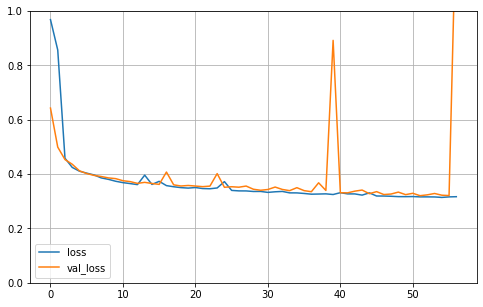

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [11]:
model.evaluate(x_test_sacled,y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.6295365767885548